# Vibration Analysis Notebook
In this notebook we will be plotting and dicussing the Power Spectrum Density (PSD) plots made by LabView using the TableStable Vibration Analyser VA-2.

In [1]:
## Make sure inline plots is on.
%matplotlib inline

## First import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt

## Set the figsize for the notebook.
mplt.rcParams['figure.figsize']=[12.0, 8.0]

In [2]:
## Next import the data and sort it by Frequency.
## v == z; h1 == towards the wall (table short axis); h2 == lengthways along table
## F == on the floor (actually on the legs of the table); P == on table with pump on; T == on table
vF = pd.read_table('Z:\GroupMembers\Fergus\Thesis\Vibration\Multiplex_acceleration_z_floor').set_index("Frequency (Hz)")
h1F = pd.read_table('Z:\GroupMembers\Fergus\Thesis\Vibration\Multiplex_acceleration_h1_floor').set_index("Frequency (Hz)")
h2F = pd.read_table('Z:\GroupMembers\Fergus\Thesis\Vibration\Multiplex_acceleration_h2_floor').set_index("Frequency (Hz)")
vP = pd.read_table('Z:\GroupMembers\Fergus\Thesis\Vibration\Multiplex_acceleration_z_pump').set_index("Frequency (Hz)")
h1P = pd.read_table('Z:\GroupMembers\Fergus\Thesis\Vibration\Multiplex_acceleration_h1_pump').set_index("Frequency (Hz)")
h2P = pd.read_table('Z:\GroupMembers\Fergus\Thesis\Vibration\Multiplex_acceleration_h2_pump').set_index("Frequency (Hz)")
vT = pd.read_table('Z:\GroupMembers\Fergus\Thesis\Vibration\Multiplex_acceleration_z_table').set_index("Frequency (Hz)")
h1T = pd.read_table('Z:\GroupMembers\Fergus\Thesis\Vibration\Multiplex_acceleration_h1_table').set_index("Frequency (Hz)")
h2T = pd.read_table('Z:\GroupMembers\Fergus\Thesis\Vibration\Multiplex_acceleration_h2_table').set_index("Frequency (Hz)")

In [3]:
## Create combined datasets
alF = vF.add(h1F.add(h2F))
alT = vT.add(h1T.add(h2T))
alP = vP.add(h1P.add(h2P))

As you can see below, these datasets are simply the output of the oscillators in the vibration analyser: the voltage is then squared, as the square of the signal would always be proportional to the actual power.

In [4]:
vF.axes[1]

Index(['PSD (Vrms^2/Hz)', 'PSD Hanning window  (Vrms^2/Hz)'], dtype='object')

The 'Hanning Window' is an apodization function used to reduce spectral leakage. From WolframMathWorld:

"Leakage, more explicitly called spectral leakage, is a smearing of power across a frequency spectrum that occurs when the signal being measured is not periodic in the sample interval. It occurs because discrete sampling results in the effective computation of a Fourier series of a waveform having discontinuities, which result in additional frequency components. Leakage is the most common error encountered in digital signal processing, and while its effects cannot be entirely eliminated, they may sometimes be reduced with the aid of a suitable apodization function."

## PSDs on the floor

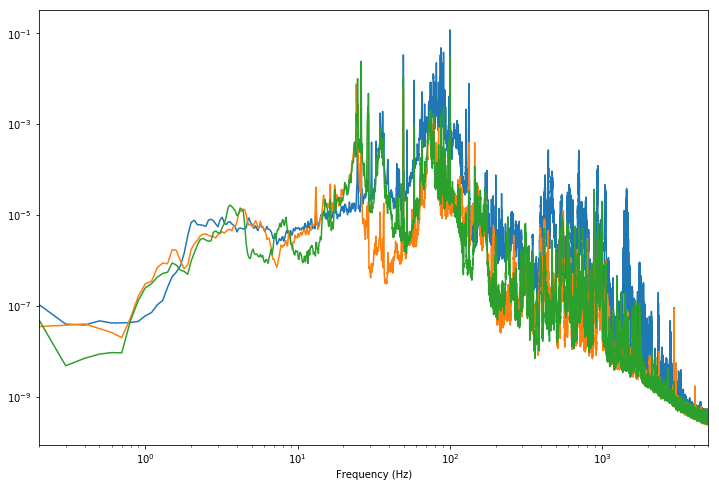

In [5]:
plt.figure();

vF.iloc[1:,1].plot(loglog='True')
h1F.iloc[1:,1].plot(loglog='True')
h2F.iloc[1:,1].plot(loglog='True')

## PSDs on the table with the pump

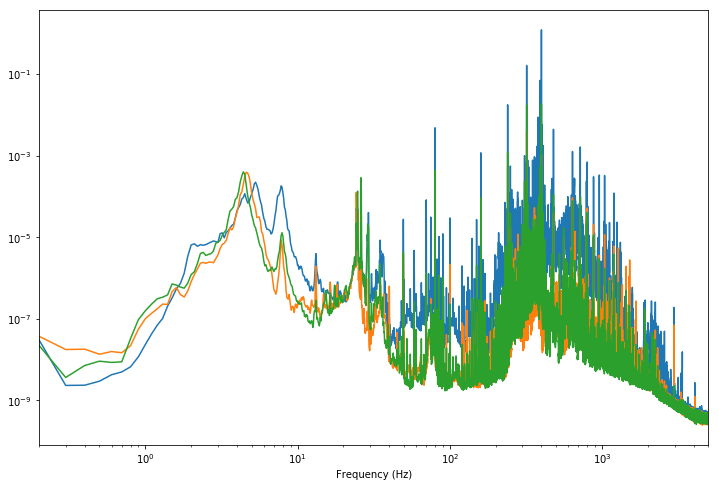

In [6]:
plt.figure();

vP.iloc[1:,1].plot(loglog='True')
h1P.iloc[1:,1].plot(loglog='True')
h2P.iloc[1:,1].plot(loglog='True')

## PSDs on the table without the pump

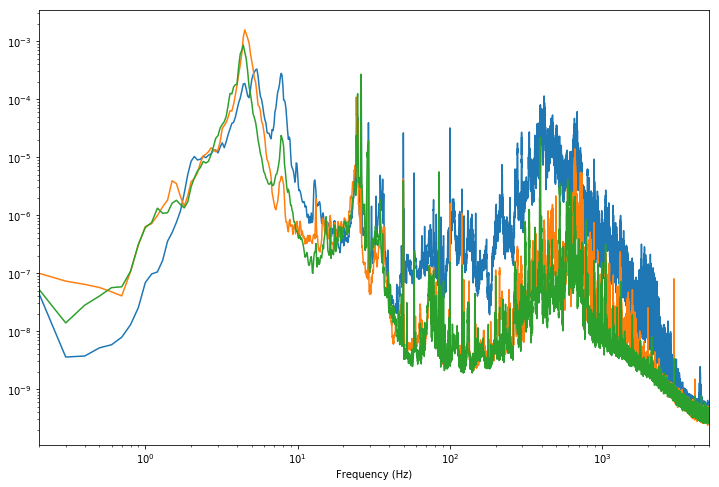

In [7]:
plt.figure();

vT.iloc[1:,1].plot(loglog='True')
h1T.iloc[1:,1].plot(loglog='True')
h2T.iloc[1:,1].plot(loglog='True')

## Combined PSDs

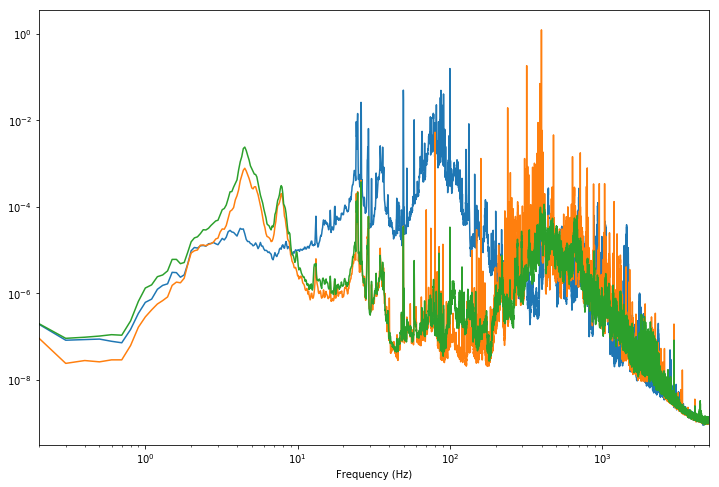

In [8]:
plt. figure();

alF.iloc[1:,1].plot(loglog='True')
alP.iloc[1:,1].plot(loglog='True')
alT.iloc[1:,1].plot(loglog='True')

## Z PSDs

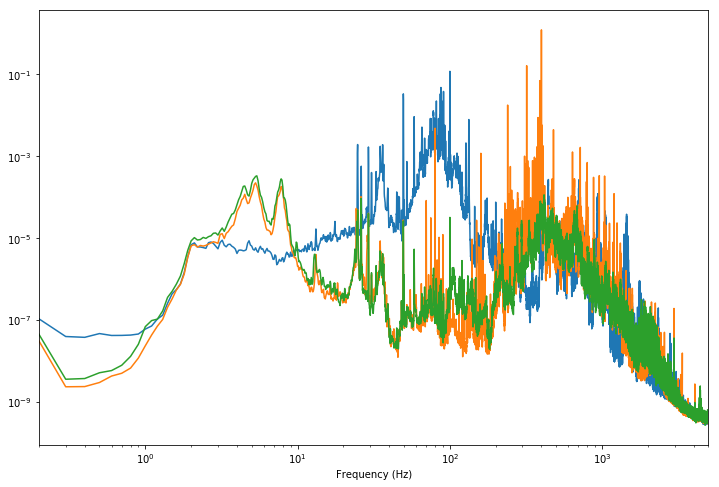

In [9]:
plt. figure();

vF.iloc[1:,1].plot(loglog='True')
vP.iloc[1:,1].plot(loglog='True')
vT.iloc[1:,1].plot(loglog='True')